In [ ]:
!pip install nimfa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
import nimfa


warnings.filterwarnings('ignore')

%matplotlib inline

np.random.seed(13)

#Define function for bmf models

In [ ]:
def bmf_lr(X_train, y_train, X_test, k):
  bmf = nimfa.Bmf(X_train, seed="nndsvd", rank=k)
  bmf_fit = bmf()
  W_train = bmf.W
  W_train = np.asarray(W_train)
  lr = LogisticRegression(C=20, penalty='l1', random_state=13, solver='liblinear', class_weight=class_weight)
  lr.fit(W_train, y_train)
  test_bmf = nimfa.Bmf(X_test, seed="nndsvd", rank=k)
  test_bmf_fit = test_bmf()
  W_test = test_bmf.W
  W_test = np.asarray(W_test)
  lr_prediction = lr.predict_proba(W_test)
  return lr, lr_prediction


In [ ]:
def bmf_kmeans(data, k, n):
  bmf = nimfa.Bmf(my_data, seed="nndsvd", rank=n)
  bmf_fit = bmf()
  W = bmf.W
  W = np.asarray(W)
  kmeans = KMeans(n_clusters=k, random_state=0).fit(W)
  return kmeans

#Data loading and preproces

In [ ]:
data = pd.read_csv('/content/features.csv')

In [ ]:
data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14.0
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18.0
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20.0
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24.0


In [ ]:
data.shape

(1062, 62)

In [ ]:
data.tail()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
1057,present3rd,Frequency of present tense verbs with 3rd pers...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1058,present1st2nd,Frequency of present tense verbs with 1st and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059,sentence1st,First sentence class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,sentencelast,Last sentence class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,txtcomplexity,Text complexity score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.isnull().sum()

TextID               0
URL                  0
Label               62
totalWordsCount     62
semanticobjscore    62
                    ..
present3rd          62
present1st2nd       62
sentence1st         62
sentencelast        62
txtcomplexity       62
Length: 62, dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

TextID              0
URL                 0
Label               0
totalWordsCount     0
semanticobjscore    0
                   ..
present3rd          0
present1st2nd       0
sentence1st         0
sentencelast        0
txtcomplexity       0
Length: 62, dtype: int64

In [ ]:
data.shape

(1000, 62)

In [ ]:
data.head()

,TextID,URL,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,http://msn.foxsports.com/foxsoccer/mexico/stor...,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0
1,Text0002,http://msn.foxsports.com/foxsoccer/premierleag...,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14.0
2,Text0003,http://uk.eurosport.yahoo.com/04022011/58/fed-...,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18.0
3,Text0004,http://uk.eurosport.yahoo.com/07022011/58/bund...,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20.0
4,Text0005,http://uk.eurosport.yahoo.com/05022011/58/fed-...,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24.0


In [ ]:
data.drop(['URL'], axis = 1, inplace = True)

In [ ]:
data

,TextID,Label,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,Text0001,objective,109.0,0.0,1.0,7.0,9.0,0.0,5.0,8.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0
1,Text0002,objective,309.0,21.0,4.0,1.0,19.0,1.0,4.0,35.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14.0
2,Text0003,objective,149.0,6.0,1.0,8.0,14.0,0.0,5.0,15.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18.0
3,Text0004,objective,305.0,18.0,5.0,7.0,26.0,0.0,10.0,37.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20.0
4,Text0005,objective,491.0,23.0,8.0,33.0,47.0,0.0,12.0,61.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Text0996,subjective,926.0,46.0,34.0,5.0,83.0,1.0,20.0,96.0,...,16.0,46.0,10.0,13.0,12.0,49.0,29.0,1.0,1.0,24.0
996,Text0997,subjective,876.0,48.0,26.0,9.0,109.0,1.0,16.0,89.0,...,8.0,43.0,5.0,34.0,9.0,19.0,31.0,1.0,1.0,21.0
997,Text0998,subjective,1469.0,82.0,53.0,14.0,171.0,1.0,10.0,157.0,...,9.0,49.0,12.0,40.0,19.0,51.0,42.0,1.0,1.0,18.0
998,Text0999,subjective,343.0,7.0,5.0,4.0,24.0,0.0,9.0,28.0,...,0.0,8.0,1.0,3.0,3.0,25.0,7.0,1.0,1.0,11.0


In [ ]:
target = data['Label']
data.drop(['Label'], axis=1, inplace=True)

In [ ]:
data.describe()

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,697.120000,39.005000,13.934000,20.626000,66.452000,1.054000,11.477000,75.151000,47.432000,2.152000,...,2.70100,19.187000,5.419000,29.942000,4.389000,17.124000,11.899000,0.927000,0.995000,19.142000
std,523.340997,32.134835,13.617528,22.765773,52.045407,1.663084,12.690174,55.927293,38.373218,2.858158,...,4.81069,16.756754,5.811989,25.226752,5.126008,17.811285,12.356354,0.260267,0.070569,6.632483
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,272.000000,13.000000,4.000000,7.000000,24.750000,0.000000,3.000000,31.750000,19.000000,0.000000,...,0.00000,6.000000,1.000000,11.000000,1.000000,4.000000,3.000000,1.000000,1.000000,15.000000
50%,626.000000,33.000000,10.000000,14.000000,58.000000,0.000000,8.000000,67.000000,40.000000,1.000000,...,1.00000,14.000000,4.000000,24.000000,3.000000,11.000000,8.000000,1.000000,1.000000,18.000000
75%,953.250000,56.000000,20.250000,26.250000,93.000000,1.000000,15.000000,103.000000,65.000000,3.000000,...,3.00000,29.000000,8.000000,44.000000,7.000000,25.000000,18.000000,1.000000,1.000000,22.000000
max,4283.000000,237.000000,97.000000,225.000000,471.000000,12.000000,96.000000,473.000000,354.000000,26.000000,...,44.00000,127.000000,39.000000,220.000000,31.000000,142.000000,97.000000,1.000000,1.000000,73.000000


In [ ]:
data.drop(['TextID'], axis=1 ,inplace=True)

In [ ]:
data

,totalWordsCount,semanticobjscore,semanticsubjscore,CC,CD,DT,EX,FW,INs,JJ,...,pronouns2nd,pronouns3rd,compsupadjadv,past,imperative,present3rd,present1st2nd,sentence1st,sentencelast,txtcomplexity
0,109.0,0.0,1.0,7.0,9.0,0.0,5.0,8.0,6.0,0.0,...,0.0,3.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0,18.0
1,309.0,21.0,4.0,1.0,19.0,1.0,4.0,35.0,23.0,0.0,...,0.0,10.0,0.0,13.0,0.0,14.0,9.0,1.0,1.0,14.0
2,149.0,6.0,1.0,8.0,14.0,0.0,5.0,15.0,11.0,0.0,...,0.0,2.0,0.0,8.0,0.0,3.0,2.0,1.0,1.0,18.0
3,305.0,18.0,5.0,7.0,26.0,0.0,10.0,37.0,21.0,1.0,...,0.0,8.0,3.0,13.0,1.0,7.0,1.0,1.0,1.0,20.0
4,491.0,23.0,8.0,33.0,47.0,0.0,12.0,61.0,36.0,0.0,...,0.0,16.0,2.0,34.0,1.0,5.0,6.0,1.0,1.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,926.0,46.0,34.0,5.0,83.0,1.0,20.0,96.0,63.0,1.0,...,16.0,46.0,10.0,13.0,12.0,49.0,29.0,1.0,1.0,24.0
996,876.0,48.0,26.0,9.0,109.0,1.0,16.0,89.0,49.0,2.0,...,8.0,43.0,5.0,34.0,9.0,19.0,31.0,1.0,1.0,21.0
997,1469.0,82.0,53.0,14.0,171.0,1.0,10.0,157.0,106.0,5.0,...,9.0,49.0,12.0,40.0,19.0,51.0,42.0,1.0,1.0,18.0
998,343.0,7.0,5.0,4.0,24.0,0.0,9.0,28.0,20.0,0.0,...,0.0,8.0,1.0,3.0,3.0,25.0,7.0,1.0,1.0,11.0


In [ ]:
target

0       objective
1       objective
2       objective
3       objective
4       objective
          ...    
995    subjective
996    subjective
997    subjective
998    subjective
999    subjective
Name: Label, Length: 1000, dtype: object

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['objective', 'subjective'])
target = le.transform(target)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,StratifiedKFold
sc = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=13, stratify=target)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
my_data = sc.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
# Reducing the dimensions of the data for visualization
pca_n = PCA(n_components = 2)
X_principal = pca_n.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']


X_principal.head()

,P1,P2
0,-614.691378,-3.372587
1,-401.530766,8.699670
2,-571.063830,0.814790
3,-406.997960,8.872582
4,-209.451331,35.986561


In [ ]:
import plotly.graph_objects as go
#plot data after pca
fig = go.Figure(go.Scatter(
    x=X_principal['P1'], y=X_principal['P2'], mode='markers'))
fig.update_xaxes(title_text='P2')
fig.update_yaxes(title_text='P1')
fig.update_layout(height=500, width=500,
                  title_text='Principal Component Analysis')

#Logistic Reggresion

In [ ]:
kf = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
class_weight = {0: (y_train == 0).mean(), 1: 1 - (y_train == 0).mean()}

In [ ]:
from math import nan
lr = LogisticRegression(random_state=13, class_weight=class_weight)
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 100, 1000]}
grid_result = GridSearchCV(estimator=lr, cv=kf, param_grid=param_grid, scoring='roc_auc')
grid_result.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
i = 0
for mean, stdev, param in zip(means, stds, params):
  if i % 2 == 1:
    print("%f (%f) with: %r" % (mean, stdev, param))
  i+=1

Best: 0.873273 using {'C': 1, 'penalty': 'l2'}
0.840978 (0.043744) with: {'C': 0.001, 'penalty': 'l2'}
0.842435 (0.043503) with: {'C': 0.005, 'penalty': 'l2'}
0.843661 (0.043403) with: {'C': 0.01, 'penalty': 'l2'}
0.852441 (0.042730) with: {'C': 0.05, 'penalty': 'l2'}
0.857390 (0.041970) with: {'C': 0.1, 'penalty': 'l2'}
0.868974 (0.034323) with: {'C': 0.5, 'penalty': 'l2'}
0.873273 (0.033322) with: {'C': 1, 'penalty': 'l2'}
0.870470 (0.024045) with: {'C': 5, 'penalty': 'l2'}
0.865515 (0.019402) with: {'C': 10, 'penalty': 'l2'}
0.860568 (0.014609) with: {'C': 20, 'penalty': 'l2'}
0.848532 (0.014424) with: {'C': 100, 'penalty': 'l2'}
0.841217 (0.015723) with: {'C': 1000, 'penalty': 'l2'}


In [ ]:
lr = LogisticRegression(C=20, penalty='l1', random_state=13, solver='liblinear', class_weight=class_weight)
lr.fit(X_train, y_train)
lr_prediction = lr.predict_proba(X_test)
roc_auc_score(y_test, lr_prediction[:, 1])



0.8744211763079689

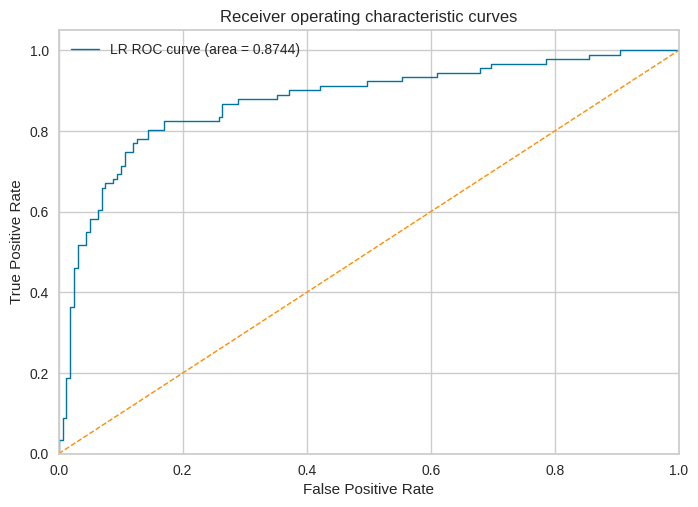

In [ ]:
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, prediction[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc


lr_fpr, lr_tpr, lr_roc_auc = generate_metrics(lr_prediction)

plt.plot(lr_fpr[1], lr_tpr[1], lw=1, label='LR ROC curve (area = %0.4f)' % lr_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()

In [ ]:
# Get the indices of the rows with negative values
negative_rows = np.any(X_test < 0, axis=1)

# Delete the rows with negative values
X_test = X_test[~negative_rows]
y_test = y_test[~negative_rows]
lr_prediction = lr.predict_proba(X_test)


In [ ]:
lr_10 = bmf_lr(X_train, y_train, X_test, 10)
lr_20 = bmf_lr(X_train, y_train, X_test, 20)
lr_30 = bmf_lr(X_train, y_train, X_test, 30)

kmeans_10 = bmf_kmeans(my_data, 5, 10)
kmeans_20 = bmf_kmeans(my_data, 5, 20)
kmeans_30 = bmf_kmeans(my_data, 5, 30)



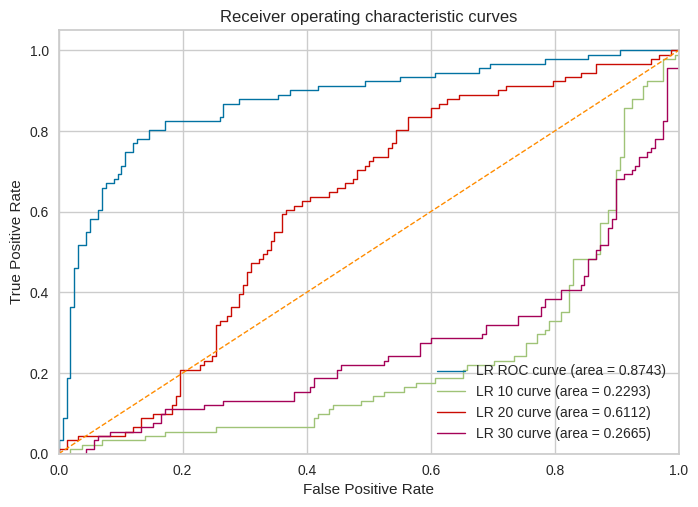

In [ ]:
lr_fpr, lr_tpr, lr_roc_auc = generate_metrics(lr_prediction)
lr10_fpr, lr10_tpr, lr10_roc_auc = generate_metrics(lr_10[1])
lr20_fpr, lr20_tpr, lr20_roc_auc = generate_metrics(lr_20[1])
lr30_fpr, lr30_tpr, lr30_roc_auc = generate_metrics(lr_30[1])


plt.plot(lr_fpr[1], lr_tpr[1], lw=1, label='LR ROC curve (area = %0.4f)' % lr_roc_auc[1])
plt.plot(lr10_fpr[1], lr10_tpr[1], lw=1, label='LR 10 curve (area = %0.4f)' % lr10_roc_auc[1])
plt.plot(lr20_fpr[1], lr20_tpr[1], lw=1, label='LR 20 curve (area = %0.4f)' % lr20_roc_auc[1])
plt.plot(lr30_fpr[1], lr30_tpr[1], lw=1, label='LR 30 curve (area = %0.4f)' % lr30_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
plt.legend(loc='best')
plt.show()

#Kmeans

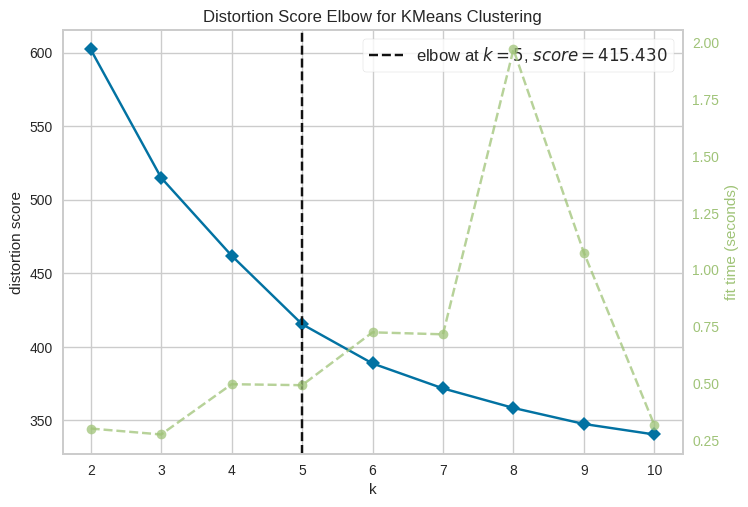

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
# Quick examination of elbow method to find numbers of clusters
Elb = KElbowVisualizer(KMeans(), k=10)
Elb.fit(my_data)
Elb.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(my_data)

<Axes: xlabel='P1', ylabel='P2'>

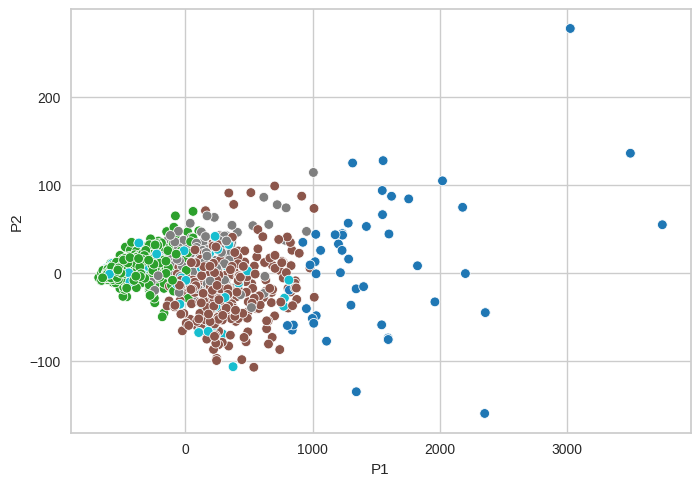

In [ ]:
sns.scatterplot(x='P1', y='P2', data=X_principal,
                c= kmeans.labels_,
                cmap='tab10')



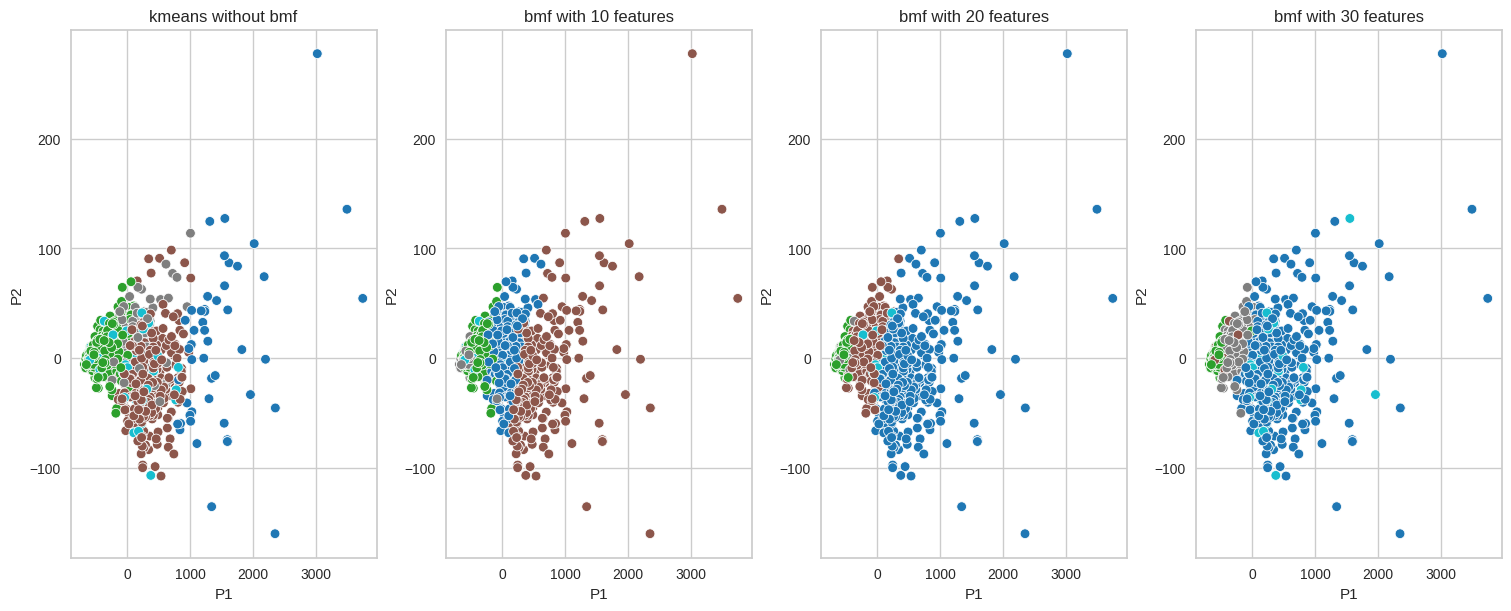

In [ ]:
kmeans_graph = {  'kmeans without bmf'  : kmeans,
                  'bmf with 10 features' : kmeans_10,
                  'bmf with 20 features': kmeans_20,
                  'bmf with 30 features': kmeans_30}

plt.figure(figsize=(15, 6), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,5)):
    plt.subplot(1,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')

    plt.title(i)

In [ ]:
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(my_data)
kmeans_10_2 = bmf_kmeans(my_data, 2, 10)
kmeans_20_2 = bmf_kmeans(my_data, 2, 20)
kmeans_30_2 = bmf_kmeans(my_data, 2, 30)

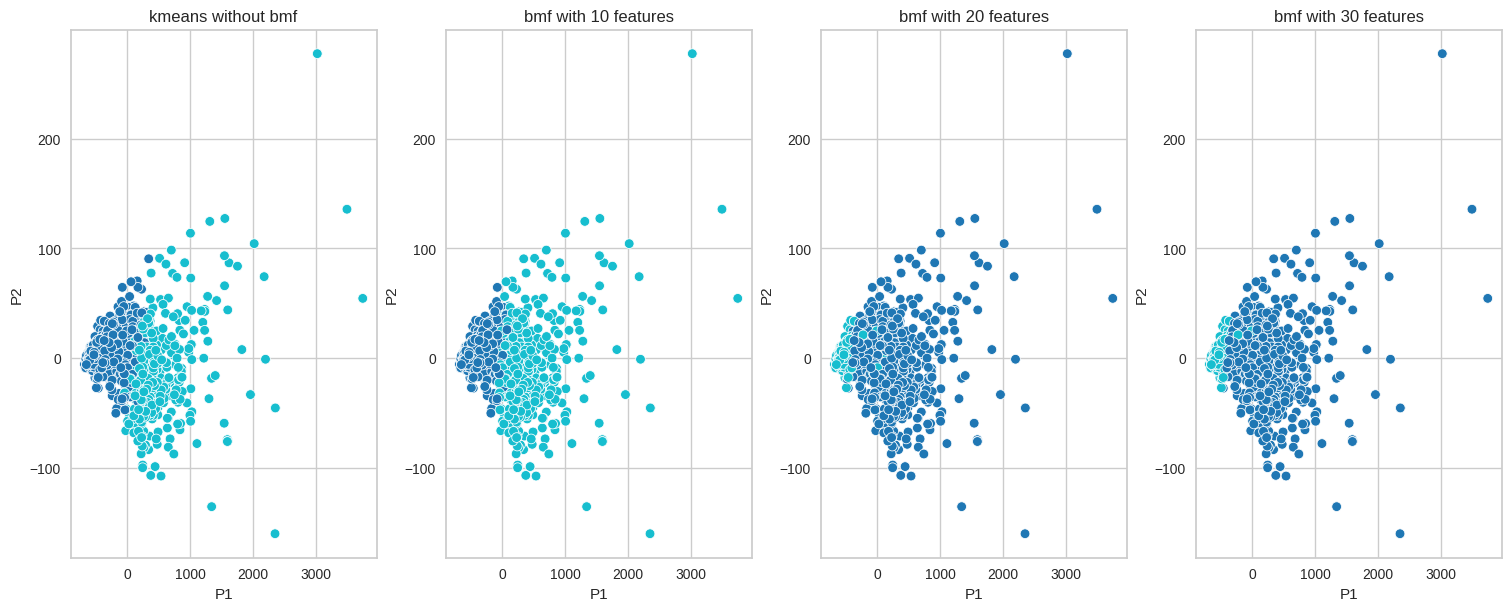

In [ ]:
kmeans_graph = {  'kmeans without bmf'  : kmeans_2,
                  'bmf with 10 features' : kmeans_10_2,
                  'bmf with 20 features': kmeans_20_2,
                  'bmf with 30 features': kmeans_30_2}

plt.figure(figsize=(15, 6), constrained_layout=True)
for i, j in zip(kmeans_graph, range(1,5)):
    plt.subplot(1,4,j)
    sns.scatterplot(x='P1', y='P2', data=X_principal,
                    c= kmeans_graph[i].labels_,
                    cmap='tab10')

    plt.title(i)

In [ ]:
from sklearn.metrics import confusion_matrix
models = [kmeans_2, kmeans_10_2, kmeans_20_2, kmeans_30_2]
conf_matrices = []
for model in models:
  cnf_matrix = confusion_matrix(target, model.labels_)
  conf_matrices.append(cnf_matrix)


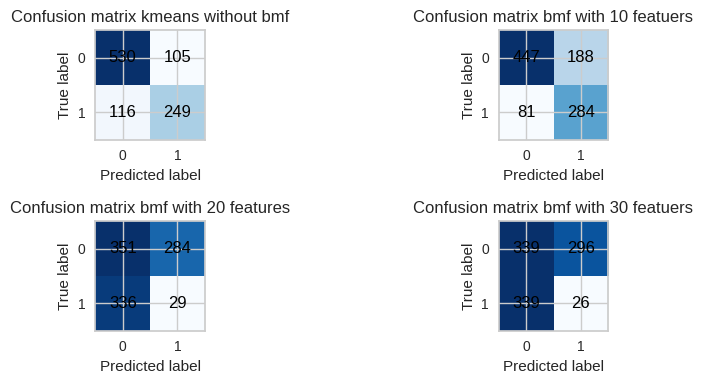

In [ ]:
models_name = ['kmeans without bmf', 'bmf with 10 featuers', 'bmf with 20 features', 'bmf with 30 featuers']
# Create a figure with 10 subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

# Plot each confusion matrix on a separate subplot
k = 0
for conf, ax in enumerate(axs.flat):
    if conf < len(conf_matrices):
        conf_matrix = conf_matrices[conf]
        ax.imshow(conf_matrix, cmap = 'Blues')
        # Add the count of each square to the plot
        for i in range(conf_matrix.shape[0]):
          for j in range(conf_matrix.shape[1]):
            ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')
        ax.set_xticks([0, 1])
        ax.set_yticks([0, 1])
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        ax.set_title(f'Confusion matrix {models_name[k]}')
        k += 1

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()